<center><h1>Projeto A2: PageRank</h1>
Fundação Getúlio Vargas - Escola de Matemática Aplicada <br>
Bacharelado em Ciência de Dados <br>
Curso de Álgebra Linear <br>
Professor: Yuri Fahham Saporito <br>
Alunos: Gianlucca Devigili e Maisa O. Fraiz</center>

## 1. Intrudução
O presente trabalho se trata da implementação de uma adaptação do algoritmo _PageRank_, desenvolvido por Sergey Bin e Larry Page, de quem o algoritmo leva o nome, em 1996, para o cálculo do _pagerank_ relacionado às fronteiras dos estados dos EUA, de modo a calcular a relevância quanto as fronteiras dos estados. Para tal utilizamos de bibliotecas python como networkx para gerar o grafo e matplotlib para sua visualização.

## 2. O algoritmo PageRank
O Pagerank é um algoritmo criado por Sergey Brin e Larry Page, fundadores da multinacional Google, em 1996. Ele foi criado com a função de servir como uma métrica para estimar a importância das páginas na internet, organizando o sistema de busca de forma que os resultados mais relevantes apareçam primeiro para o usuário.<br>

De acordo com Google (2020), o a relevância de uma página é calculada, dentre diversos outros fatores decorridos da sofisticação do algoritmo, através da relevância das páginas que possuem links que apontem para ela.<br>

O cálculo do PageRank se dá por meio de quantos links existentes se conectam para uma página P qualquer. Cada página $P_j$ contém $L_j$ links. Se um link de $P_j$ redireciona para $P_i$ , então $P_i$ receberá $\frac{1}{L_j}$ do PageRank de $P_j$. Considere $B_i$ como o conjunto de páginas cujos links redirecionam para $P_i$. O PageRank de $P_i$ será: 

$$PR(Pi) = \sum_{Pj \in Bi}^{} \frac{PR(Pj)}{Lj}$$

Para calcular o PageRank usando Álgebra Linear, é criada uma matriz $A$ tal que cada entrada $A_{ij}$ será $\frac{1}{L_j}$ se $P_j$ tiver um link que redirecione para $P_i$. Se $P_j$ e $P_i$ não forem conectados, $A_{ij}$ será nulo. Enquanto $P_j$ conter pelo menos um link, $A$ será uma matriz de Markov. O PageRank pode ser calculado descobrindo o autovetor estacionário de $A$, ou seja, o vetor $I$ tal que $AI=I$. (AUSTIN, 2006). <br>
<br>
### 2.1. Exemplo com grafo simplificado

Utilizaremos aqui o exemplo dado por Austin (2006): Imagine que existem apenas 8 páginas representadas pelo seguinte grafo:<br>

Figura 1: Grafo Exemplo <br>
<center><img src="img/sample_graph.jpg"/> <br></center>
<center>Fonte: Dados Primários, 2020</center>


Cada nó (vértice) do grafo é uma página e cada aresta indica um link entre duas páginas. A matriz relacionada ao exemplo é: <br>
$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 1/3 & 0\\1/2 & 0 & 1/2 & 1/3 & 0 & 0 & 0 & 0\\1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 1/2 & 1/3 & 0 & 0 & 1/3 & 0\\0 & 0 & 0 & 1/3 & 1/3 & 0 & 0 & 1/2\\0 & 0 & 0 & 0 & 1/3 & 0 & 0 & 1/2\\0 & 0 & 0 & 0 & 1/3 & 1 & 1/3 & 0\end{bmatrix}$$

que tem como vetor estácionário (pageranks):
$$I = \begin{bmatrix} 0.0600\\0.0675\\0.0300\\0.0675\\0.0975\\0.2025\\0.1800\\0.2950\end{bmatrix}$$

No exemplo, o página 8 tem uma relevância maior, ou seja, em um algoritmo de pesquisa consideraria ela mais relevante e apareceria por primeiro, sendo seguida pela página 6 e assim por diante.
<br>


### 2.2. Possíveis problemas
No caso da coluna $A_j$ conter apenas valores nulos, significa que o vértice $P_j$ é um vértice disconexo. Também é possível haver um conjunto de páginas que formem um ciclo de links entre si, de forma que vez que o usuário entra nelas, não é possível sair. Em ambos dos casos, o cálculo do PageRank falha.<br>

Figura 2: Grafo com Erros no PageRank <br>
<center><img src="img/sample_graph2.jpg"><br></center>
<center>Fonte: AUSTIN, 2006</center>

Esse problema pode ser resolvido escolhendo um valor $0 ≤ α ≤ 1$ que determina a probabilidade de, ao percorrer o grafo, ser redirecionado para uma nó qualquer, independentemente das ligações. Quanto mais próximo $α$ for de $1$, mais peso têm as ligações e mais tempo levará o processo para descobrir o autovetor. <br>
A Google usa $α = 0.85$, levando entre $50$ e $100$ iterações do método de potencialização para achar valores de PageRank satisfatoriamente aproximados.
<br>

### 2.3. Outras Aplicações
O PageRank também é muito utilizado fora da Google, como na medicina, no desenvolvimento de softwares, no esporte e na bibliometria. Dentre algumas aplicações do PageRank, estão:

+ Utilizando $\alpha = 0.92$ em uma rede de interações de proteínas, o pagerank pode ser usado para descobrir quais genes estão relacionados com a diabetes tipo 2;

+ Estudos acerca de um tipo de câncer pancreático, que encontram genes que preveem se o paciente sobreviveria à doença com um pagerank utilizando $\alpha = 0.3$;

+ Algoritmo **Monitor Rank:** ao retornar uma lista ordenada dos possíveis responsáveis por um erro na programação, utilizado por administradores de sistemas para o diagnóstico e solução de erros;

+ Dados geográfico como prever tráfego e movimento humano utilizando um grafo onde as ruas são representadas por arestas e suas intersecções por vértices. Neste caso $\alpha$ é gerado a cada iteração de acordo com a probabilidade da viagem acabar em determinada rua. Tal tipo de aplicação é usado em softwares de transporte urbano que fazem uso de GPS;

+ Criar uma rede de vencedores em esporte, onde cada time é um nó e cada jogo é uma linha. Em uma partida entre dois times, $A$ e $B$, o time que ganha passa seus pontos para o outro;

+ Pode ser usado para medir a influência de revistas científicas e artigos com base nas citações entre elas;

+ Algoritmo **ItemRank**: utilizado para recomendar itens como produtos em _e-commerces_ ou filmes e séries em plataformas de _streaming_;

+ Em redes sociais, o pagerank pode ser usado para prever potenciais conexões e amizades entre usuários, recomendar perfis a serem seguidos e estimar a influência dos usuários;

+ Também existem o **TrustRank** e **BadRank**, que analisam a possibilidade de um site estar abusando de spam para aumentar o seu PageRank, tais algoritmos são utilizados pelo _Google_ e outros sistemas de pesquisa para evitar relatarem como relevantes página.

(GLEICH, 2014), (MILLER, 2020), (ASP, 2015).

## 3. Implementação
<p> Para a implementação do algoritmo de pagerank utilizada no presente trabalho foi utilizado um grafo não direcionado onde cada nó (vértice) representa um dos estados dos EUA e a existência de uma aresta entre dois nós indica que os dois estados fazem fronteira entre si. </p>

In [1]:
import re, sys, math, csv, types
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

A implementação do algoritmo pagerank no presente trabalho é uma adaptação de ASP (2015) para grafos não direcionados. Utilizamos o dataset _"stateborders.csv"_ que contém todos os estados dos EUA e suas respectivas fronteiras, onde a primeira e terceira coluna indicam uma aresta do grafo que representa o país<sup>1</sup>. Abaixo seguem as primeiras 10 linhas de amostra para visualização:<br><br>

<sup>1</sup>. O _dataset_ se encontra dessa maneira pois o algoritmo de Asp (2015) é utilizado para calcular o pagerank de outros datasets que fazem uso da segunda e da quarta coluna


In [2]:
filename = "stateborders.csv"
file = csv.reader(open(filename, 'r'), delimiter = ',')
data = [row for row in file]
for i_row in range(10):
    print(data[i_row])

['AL', '0', 'FL', '0']
['AL', '0', 'GA', '0']
['AL', '0', 'MS', '0']
['AL', '0', 'TN', '0']
['AZ', '0', 'CA', '0']
['AZ', '0', 'NM', '0']
['AZ', '0', 'NV', '0']
['AZ', '0', 'UT', '0']
['AR', '0', 'LA', '0']
['AR', '0', 'MS', '0']


O grafo foi gerado com o _package networkx_ onde cada vértice representa um estados e a existência de uma aresta $uv$ indica que o estado $u$ faz fronteira com o estado $v$. O grafo gerado não é direcionado, como o habitual em parte das aplicações do _pagerank_ pois trata-se de dados geográficos, ou seja,o estado $u$ ter fronteira com o estado $v$ implica que $v$ faz fronteira com $u$. Uma aplicação análoga é a rede de amigos do _Facebook_<br><br>

In [3]:
nodes = set([row[0] for row in data])
print(f'Nós do grafo: {nodes}', sep=" ")

Nós do grafo: {'IA', 'CO', 'NV', 'WY', 'CA', 'MT', 'OK', 'SC', 'FL', 'WV', 'IN', 'MS', 'NC', 'NE', 'UT', 'OR', 'CT', 'NJ', 'WI', 'AZ', 'MN', 'NM', 'MO', 'SD', 'VA', 'TX', 'IL', 'MI', 'DE', 'DC', 'MA', 'ME', 'ID', 'OH', 'AR', 'NY', 'KS', 'ND', 'NH', 'WA', 'AL', 'LA', 'PA', 'GA', 'RI', 'KY', 'VT', 'MD', 'TN'}


In [4]:
edges = [(row[0], row[2]) for row in data]
print("Exemplos de Aresta: ", end= "")
for i_edge in range(10):
    print(edges[i_edge], end=", ")

Exemplos de Aresta: ('AL', 'FL'), ('AL', 'GA'), ('AL', 'MS'), ('AL', 'TN'), ('AZ', 'CA'), ('AZ', 'NM'), ('AZ', 'NV'), ('AZ', 'UT'), ('AR', 'LA'), ('AR', 'MS'), 

<center><img src="img/usa_graph.gif" style="border: 0 auto;"/><br></center>
<center>Fonte: WEISSTEIN, 201-</center>

Os Estados do Alaska e Havaí foram removidos pois não possuem _"links"_ com os demais estados, o que geraria erro no algoritmo como explicado anteriormente

Então calculamos o valor base de cada rank com a razão:
$$\frac{1}{|V(G)|}$$
onde $|V(G)|$ é o número de nós do grafo. No presente exemplo o rank base de cada nó é:

In [5]:
rank = 1/float(len(nodes))
print(f'{rank}')

0.02040816326530612


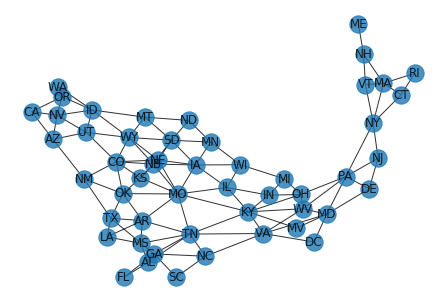

In [6]:
graph = nx.Graph()
graph.add_nodes_from(nodes, rank=rank)
graph.add_edges_from(edges)
nx.draw_spring(graph, with_labels =  True, alpha = 0.8)

### 3.1. O Algoritmo em python

O cálculo do _pagerank_ em si é dado pelo algoritmo abaixo:

In [7]:
V = len(graph) 
alpha = 0.85 

Utilizamos $\alpha = 0.85$, o mesmo utilizado pelo _Google_ de modo a evitar um _loop_.

In [8]:
ranks = {}

for key, node in graph.nodes(data=True):
    ranks[key] = node.get("rank") #atribui o valor inicial de 0.02040816326530612 a todos os vértices

for i in range(10): # itera 10 vezes, algoritmos como o do Google realizam entre 50 e 100 iterações
    for key, node in graph.nodes(data=True): 
        rank_sum = 0
        curr_rank = node.get('rank')

        neighbors = graph[key]
        for n in neighbors:
            if ranks[n] is not None:
                outlinks = len(list(graph.neighbors(n)))
                rank_sum += (1 / float(outlinks)) * ranks[n]

        ranks[key] = ((1 - float(alpha)) * (1/float(V))) + alpha * rank_sum

sorted(ranks.items(), key = lambda x : x[1], reverse = True)

[('MO', 0.03154419141589557),
 ('KY', 0.03107864029675898),
 ('TN', 0.031062265257940133),
 ('MA', 0.028718919537401348),
 ('PA', 0.026872163950321677),
 ('MD', 0.026684310295765016),
 ('GA', 0.02623788858929839),
 ('NY', 0.02611005372636707),
 ('SD', 0.025921892589275273),
 ('WY', 0.02570007539522352),
 ('IA', 0.025465140819711813),
 ('CO', 0.02527391845078927),
 ('ID', 0.025094871424910837),
 ('VA', 0.025031173423556187),
 ('AR', 0.023246686417844564),
 ('OK', 0.022296799874009742),
 ('NV', 0.02169883115944952),
 ('NB', 0.021447457669185512),
 ('NE', 0.021437632464385428),
 ('OH', 0.021082533491979798),
 ('WV', 0.02093093854300284),
 ('TX', 0.02034996015144364),
 ('NH', 0.020323084778100135),
 ('UT', 0.02011381766595635),
 ('IL', 0.019466523555408295),
 ('OR', 0.018701714789167847),
 ('KS', 0.018220907384341827),
 ('AL', 0.018041339082631204),
 ('VT', 0.018020309279223906),
 ('NC', 0.01793077783920457),
 ('CT', 0.017717449474306632),
 ('AZ', 0.01758769492750501),
 ('MS', 0.0171262921

In [9]:
## 4.  Conclusão

## Referências

AUSTIN, David. **How Google Finds Your Needle in the Web's Haystack. American Mathematical Society**, 2006. Disponível em: http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank. Acesso em: 14 nov. 2020. <br>

ASP, Timothy. **PageRank.** 2015. Disponível em: https://github.com/timothyasp/PageRank. Acesso em: 18 nov. 2020.<br>

GLEICH, David F. **PAGERANK BEYOND THE WEB**. 2014. Disponível em: https://arxiv.org/pdf/1407.5107.pdf. Acesso em: 16 nov. 2020.

GOOGLE. **Como funcionam os algoritmos da Pesquisa:** classificar páginas úteis. Classificar páginas úteis. Disponível em: https://www.google.com/search/howsearchworks/algorithms/. Acesso em: 14 nov. 2020. <br>

MILLER, Colton. **A HISTORY LESSON ON PAGERANK**. 2020. Disponível em: https://www.boostability.com/a-history-lesson-on-pagerank/#:~:text=Google%20founders%20Larry%20Page%20and,backbone%20behind%20Google%20search%20results. Acesso em: 14 nov. 2020.

WEISSTEIN, Eric W. **Contiguous USA Graph.** 201-. Disponível em: https://mathworld.wolfram.com/ContiguousUSAGraph.html. Acesso em: 14 nov. 2020. <br>